## Importing The Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib as mplib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas()
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_seletion import train_test_split

In [2]:
tf.__version__

'2.4.1'

## Loading The Dataset

In [3]:
pd.__version__

'1.3.0'

In [4]:
mplib.__version__

'3.4.2'

In [5]:
data = pd.read_csv("./sentiment labelled sentences/amazon_cells_labelled.txt", delimiter="\t", header=None)

In [6]:
data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [7]:
data.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [8]:
data.tail()

,0,1
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0
999,"You can not answer calls with the unit, never ...",0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.describe()

,1
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [11]:
data.value_counts

<bound method DataFrame.value_counts of                                                      0  1
0    So there is no way for me to plug it in here i...  0
1                          Good case, Excellent value.  1
2                               Great for the jawbone.  1
3    Tied to charger for conversations lasting more...  0
4                                    The mic is great.  1
..                                                 ... ..
995  The screen does get smudged easily because it ...  0
996  What a piece of junk.. I lose more calls on th...  0
997                       Item Does Not Match Picture.  0
998  The only thing that disappoint me is the infra...  0
999  You can not answer calls with the unit, never ...  0

[1000 rows x 2 columns]>

In [12]:
import numpy as np

In [13]:
np.__version__

'1.19.5'

In [14]:
np.mean([len(row[0]) for index, row in data.iterrows() if row[1] is 0])    

56.824

In [15]:
np.mean([len(row[0]) for index, row in data.iterrows() if row[1] is 1])    

53.628

In [16]:
len([len(row[0]) for index, row in data.iterrows() if row[1] is 0])    

500

In [17]:
data.dtypes

0    object
1     int64
dtype: object

In [18]:
data.shape

(1000, 2)

In [19]:
data.columns

Int64Index([0, 1], dtype='int64')

In [20]:
data.isnull().sum()

0    0
1    0
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='1'>

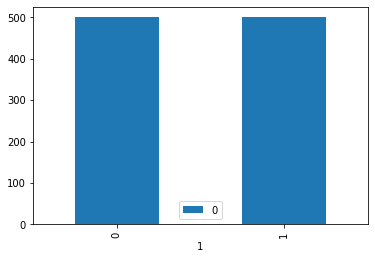

In [21]:
data.groupby(1).count().plot(kind='bar')

### Word count distribution for all the text

In [22]:
text_length = pd.Series([len(row.split()) for row in data[0]])

<AxesSubplot:>

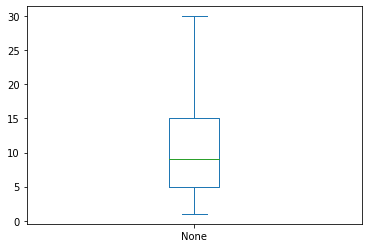

In [23]:
text_length.plot(kind = "box")

### Word count distribution for postive texts

In [24]:
pos_text_length = pd.Series([len(row[0].split()) for index, row in data.iterrows() if row[1] is 1])

<AxesSubplot:>

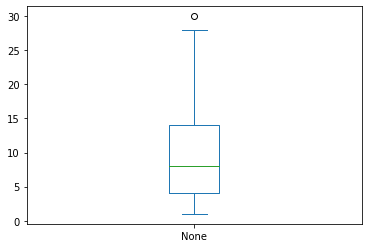

In [25]:
pos_text_length.plot(kind = "box")

### Word count distribution for negative texts

In [26]:
neg_text_length = pd.Series([len(row[0].split()) for index, row in data.iterrows() if row[1] is 0])

<AxesSubplot:>

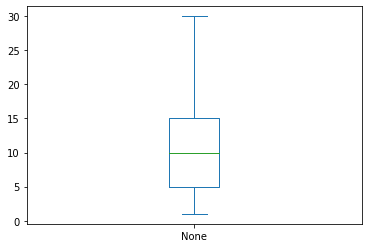

In [27]:
neg_text_length.plot(kind = "box")

### Word count histogram

In [28]:
import seaborn as sb

In [29]:
sb.__version__

'0.11.1'

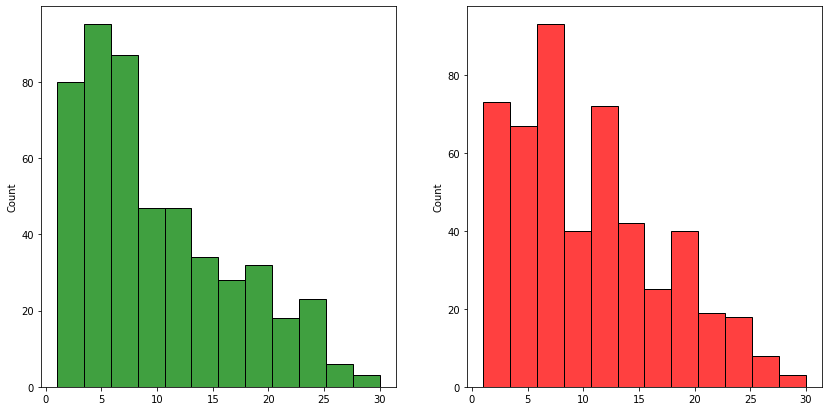

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(14, 7)
sb.histplot([len(row[0].split()) for index, row in data.iterrows() if row[1] is 1], ax = ax1, color="green")
sb.histplot([len(row[0].split()) for index, row in data.iterrows() if row[1] is 0], ax = ax2, color="red")
plt.show()

In [31]:
from wordcloud import WordCloud, STOPWORDS

In [32]:
wc = WordCloud(background_color="white", max_words=40, stopwords=STOPWORDS)

Text(0.5, 1.0, 'Negative Sentiment Words')

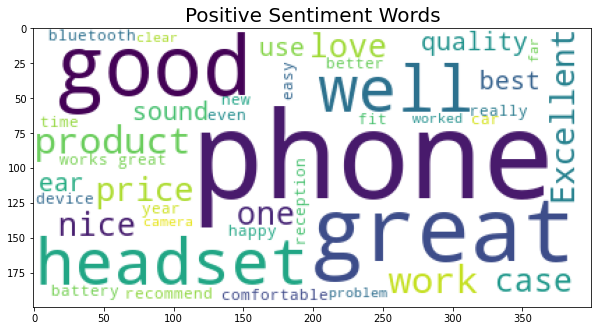

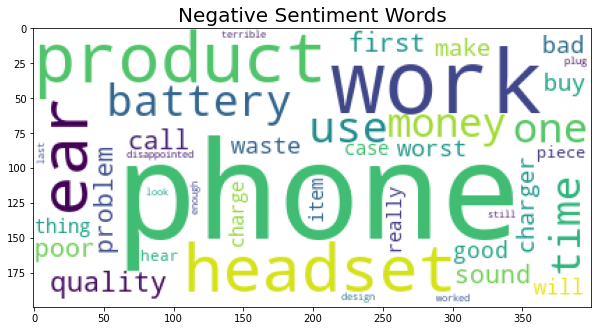

In [33]:
fig, _ = plt.subplots()
fig.set_size_inches(10, 7)
plt.imshow(wc.generate(" ".join([row[0] for index, row in data.iterrows() if row[1] is 1])))
plt.title("Positive Sentiment Words", fontsize=20)

# ================================================================

fig, _ = plt.subplots()
fig.set_size_inches(10, 7)
plt.imshow(wc.generate(" ".join([row[0] for index, row in data.iterrows() if row[1] is 0])))
plt.title("Negative Sentiment Words", fontsize=20)

### Data Preprocessing

In [34]:
import re

In [35]:
re.__version__

'2.2.1'

#### Removing special chars

In [36]:
texts = data[0].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x))

In [37]:
texts[0]

'So there is no way for me to plug it in here in the US unless I go by a converter'

In [38]:
data[0][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

#### Text to Word

In [39]:
words = [text.split() for text in texts]

In [40]:
words[0]

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter']

In [41]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/i310044/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
from nltk.corpus import stopwords
from nltk.stem.porter import *

#### Stemming

In [43]:
## Stem the words
def stem_text(text_words):
    ps = PorterStemmer()
    stemmed_words = [ps.stem(word) for word in text_words]
    return stemmed_words

# words = [stem_text(text_words) for text_words in words]

In [44]:
words[0]

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter']

In [45]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### Remove stopwords

In [46]:
def remove_stopwords(text_words):
    return [word for word in text_words if word not in stopwords.words("english")]

#words = [remove_stopwords(text_words)  for text_words in words]

In [47]:
data[0][0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [48]:
words[0]

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter']

In [49]:
converted_texts = [" ".join(text_words) for text_words in words]

In [50]:
converted_texts[0]

'So there is no way for me to plug it in here in the US unless I go by a converter'

#### Vocab

In [51]:
def build_vocab(words, verbose=True):
    vocab = {}
    for converted_text in tqdm(words, disable = (not verbose)):
        for word in converted_text:
            if word in vocab:
                vocab[word] += 1
            else:
                vocab[word] = 1
    return vocab

vocab = build_vocab(words, False)
print({k: vocab[k] for k in list(vocab)[:5]})

{'So': 10, 'there': 13, 'is': 243, 'no': 19, 'way': 7}


#### Tokenize

In [53]:
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(converted_texts)

In [54]:
vocab_size = len(tokenizer_obj.word_index) + 1
print(vocab_size)

1906


In [55]:
max_length = max([len(converted_text.split()) for converted_text in converted_texts])
print(max_length)

30


In [56]:
tokens = tokenizer_obj.texts_to_sequences(converted_texts)
#print(tokens)

In [57]:
#### TODO: Use pretrained embeddings

#### Pad sequences

In [58]:
padded_tokens = pad_sequences(
    tokens, maxlen= max_length, padding="post"
)
print(padded_tokens[:5])

[[ 33 116   5  58 210  11  50   8 153   4  19 330  19   1 539 540   2 236
  185   6 791   0   0   0   0   0   0   0   0   0]
 [ 21  48  53 264   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16  11   1 406   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [792   8  83  11 407 541  84  51 793 794 139   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  1 331   5  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]


#### Train Test Split

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_tokens, data[1].values, test_size = 0.3, random_state=42)

In [95]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=42)

In [96]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(700, 30)
(150, 30)
(150, 30)


### Build the model

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

### Hyeperparameters
embedding_dim = 200
lstm_out_dim = 64

model= Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(LSTM(units=lstm_out_dim, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 30, 200)           381200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                67840     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 449,105
Trainable params: 449,105
Non-trainable params: 0
_________________________________________________________________


In [98]:
### HyperParameters
loss = "binary_crossentropy"
optimizer = "adam"
model.compile(loss=loss, optimizer=optimizer, metrics=["accuracy"])

#### Model Training

In [99]:
### Hyperparameters
epochs = 50
batch_size = 32

model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/50
22/22 [==============================] - 2s 26ms/step - loss: 0.6979 - accuracy: 0.4573
Epoch 2/50
22/22 [==============================] - 1s 25ms/step - loss: 0.6933 - accuracy: 0.4933
Epoch 3/50
22/22 [==============================] - 1s 26ms/step - loss: 0.6613 - accuracy: 0.6038
Epoch 4/50
22/22 [==============================] - 1s 26ms/step - loss: 0.3467 - accuracy: 0.8844
Epoch 5/50
22/22 [==============================] - 1s 26ms/step - loss: 0.1701 - accuracy: 0.9574
Epoch 6/50
22/22 [==============================] - 1s 25ms/step - loss: 0.1371 - accuracy: 0.9667
Epoch 7/50
22/22 [==============================] - 1s 26ms/step - loss: 0.1381 - accuracy: 0.9644
Epoch 8/50
22/22 [==============================] - 1s 26ms/step - loss: 0.0343 - accuracy: 0.9922
Epoch 9/50
22/22 [==============================] - 1s 26ms/step - loss: 0.0147 - accuracy: 0.9956
Epoch 10/50
22/22 [==============================] - 1s 26ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 11/

#### Model Evaluation

In [100]:
score, acc = model.evaluate(X_val, Y_val, batch_size=batch_size)

5/5 [==============================] - 0s 4ms/step - loss: 1.4759 - accuracy: 0.8267


#### Model prediction

In [102]:
sample_index=0
print(X_test[sample_index])
print(Y_test[sample_index])

[   2   22  354   80   11  224  375    3 1358    3   36 1359  192  321
    3  438   12   37    0    0    0    0    0    0    0    0    0    0
    0    0]
1


In [103]:
text_1 = "Received fake product original Viroprotek is blue in colour, I got this white coloured."
text_2 = "Good Product"
text_3 = "RASH FACTORY!!!! DONT BUY THIS please"
text_4 = "Good Product Value For money"
text_5 = "Junk"
text_6 = "Harmful material detected"
test_samples = [text_1, text_2, text_3, text_4, text_5, text_6]

In [104]:
test_samples

['Received fake product original Viroprotek is blue in colour, I got this white coloured.',
 'Good Product',
 'RASH FACTORY!!!! DONT BUY THIS please',
 'Good Product Value For money',
 'Junk',
 'Harmful material detected']

In [106]:
test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_padded = pad_sequences(test_samples_tokens)
print(test_samples_tokens_padded)

[[ 248   24  266    5  337   19    2  137    7  589]
 [   0    0    0    0    0    0    0    0   21   24]
 [   0    0    0    0    0    0   46   88    7  735]
 [   0    0    0    0    0   21   24  264   11   85]
 [   0    0    0    0    0    0    0    0    0  207]
 [   0    0    0    0    0    0    0    0    0 1791]]


In [107]:
predictions = model.predict(test_samples_tokens_padded)

array([[0.6129384 ],
       [0.37713552],
       [0.24728674],
       [0.6529829 ],
       [0.2749647 ],
       [0.28143084]], dtype=float32)